# Data Exploration
## Basic Visualisation
## Calculate Correlation

In [1]:
import math
import pandas as pd
from sklearn import neighbors, datasets , preprocessing,svm
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, train_test_split
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
df = pd.read_csv('mm_master_demos.csv')
del df['Unnamed: 0']
del df['file']
del df['date']
del df['seconds']
del df['att_team']
del df['att_side']
del df['vic_team']
del df['vic_side']
del df['winner_team']
del df['winner_side']
del df['att_id']
del df['vic_id']
del df['award']
del df['is_bomb_planted']
del df['bomb_site']
data=df.copy()
data=shuffle(data)
data

,map,round,tick,hp_dmg,arm_dmg,hitbox,wp,wp_type,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
175379,de_mirage,1,9101,28,0,Chest,P2000,Pistol,9,10,-1295.73300,-2431.82700,-163.52660,-2196.129000,PISTOL_ROUND,2450,2350,9.0
903816,de_mirage,3,19290,44,0,Stomach,AK47,Rifle,11,11,47.66050,-2163.23800,-364.10040,-2191.763000,ECO,1850,20500,11.0
104196,de_inferno,2,12358,13,0,Chest,P90,SMG,16,15,552.25410,2093.68200,816.44860,1868.000000,ECO,6100,17750,15.0
33692,de_dust2,25,166212,10,3,Generic,HE,Grenade,13,13,-76.05359,-685.37510,545.24080,571.435500,NORMAL,15550,23550,13.0
247244,de_mirage,9,58389,15,2,Chest,AK47,Rifle,15,16,-713.00390,-2140.82300,-1031.75900,-2559.284000,NORMAL,33150,21300,16.0
351751,de_train,9,45903,100,1,Stomach,AWP,Sniper,17,13,-104.40110,232.93010,394.97990,-207.217800,NORMAL,20450,32950,15.0
672765,de_mirage,14,92835,86,18,Head,M4A4,Rifle,8,10,-789.49430,-2294.26100,-496.00160,-1309.031000,NORMAL,23150,21050,9.0
497505,de_mirage,12,76607,21,3,RightArm,P250,Pistol,17,14,-695.15110,-1105.73100,-631.88450,-369.060300,ECO,2700,24450,16.0
236556,de_dust2,15,82168,16,3,Chest,P90,SMG,7,4,-1189.57200,2131.63900,-1356.61500,2233.933000,NORMAL,20900,26900,7.0
539596,de_mirage,9,56783,2,7,Chest,Glock,Pistol,6,9,-789.07610,-1431.66200,-1068.02500,-1471.231000,FORCE_BUY,31200,18250,8.0


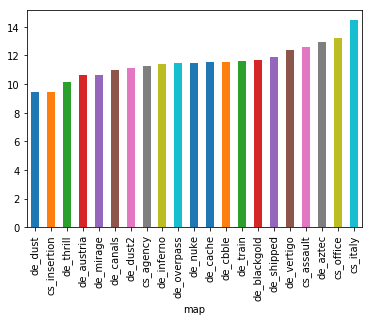

In [3]:
data.groupby('map')['att_rank'].mean().sort_values().plot(kind='bar')

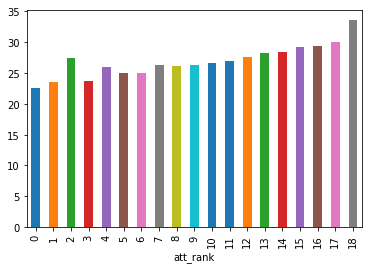

In [4]:
data.groupby('att_rank')['hp_dmg'].mean().plot(kind='bar')

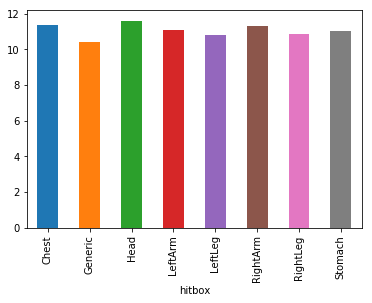

In [5]:
data.groupby('hitbox')['att_rank'].mean().plot(kind='bar')

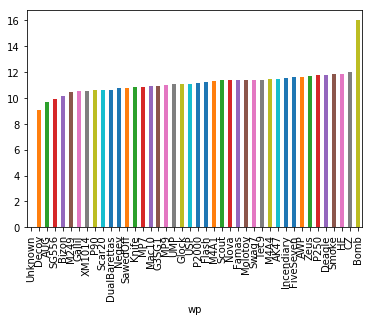

In [6]:
data.groupby('wp')['att_rank'].mean().sort_values().plot(kind='bar')

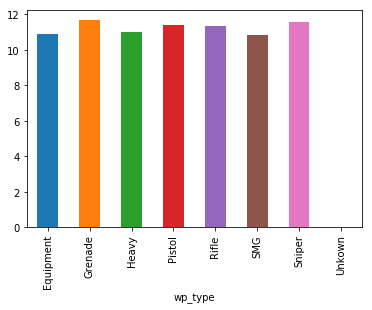

In [7]:
data.groupby('wp_type')['att_rank'].mean().plot(kind='bar')

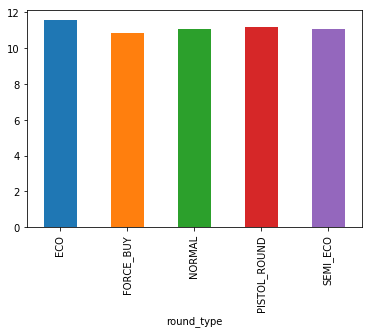

In [8]:
data.groupby('round_type')['att_rank'].mean().plot(kind='bar')

In [9]:
data.round_type.value_counts()

NORMAL          425090
ECO             244599
FORCE_BUY       143944
PISTOL_ROUND     75133
SEMI_ECO         66700
Name: round_type, dtype: int64

In [10]:
data.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox             object
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type         object
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

# Data Preparation
## Filer
- Normalization
- Convert Text values to numbers

## Convert Categories
### Hitbox
Head and Chest --> UpperBody --> 0
Stomach and Arms --> CenterBody --> 1
Legs and Generic --> LowerBody --> 2

### Map
low skill high skill?

### Weapons
one hot encode has_bomb --> can KNN handle 0 values?
what todo with rest??

### Round Type
ECO --> 0
NORMAL, PISTOL, SEMI_ECO --> 1
FORCE_BUY --> 2

In [11]:
numeric_cats = {
    "hitbox": {"Head": 0, "Chest": 0, "Stomach": 1, "RightArm": 1, "LeftArm": 1, "Generic": 2, "RightLeg": 2, "LeftLeg": 2},
    "round_type": {"ECO": 0, "NORMAL": 1, "PISTOL_ROUND": 1, "SEMI_ECO": 1, "FORCE_BUY": 2}
}
data.replace(numeric_cats, inplace=True)
data.head()
data.hitbox.value_counts()
data.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox              int64
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type          int64
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

In [12]:
data = pd.get_dummies(data, columns=['map', 'wp_type', 'wp'])
data.head()
data.dtypes

round                 int64
tick                  int64
hp_dmg                int64
arm_dmg               int64
hitbox                int64
att_rank              int64
vic_rank              int64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type            int64
ct_eq_val             int64
t_eq_val              int64
avg_match_rank      float64
map_cs_agency         uint8
map_cs_assault        uint8
map_cs_insertion      uint8
map_cs_italy          uint8
map_cs_office         uint8
map_de_austria        uint8
map_de_aztec          uint8
map_de_blackgold      uint8
map_de_cache          uint8
map_de_canals         uint8
map_de_cbble          uint8
map_de_dust           uint8
map_de_dust2          uint8
map_de_inferno        uint8
map_de_mirage         uint8
                     ...   
wp_G3SG1              uint8
wp_Gallil             uint8
wp_Glock              uint8
wp_HE                 uint8
wp_Incendiary       

In [13]:
rankData = data['att_rank']
normalizedData = (data-data.min())/(data.max()-data.min())
normalizedData['att_rank']=rankData.values
normalizedData

,round,tick,hp_dmg,arm_dmg,hitbox,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,...,wp_Scar20,wp_Scout,wp_Smoke,wp_Swag7,wp_Tec9,wp_UMP,wp_USP,wp_Unknown,wp_XM1014,wp_Zeus
175379,0.000000,0.013488,0.28,0.00,0.0,9,0.555556,0.498733,0.104825,0.564693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
903816,0.068966,0.059651,0.44,0.00,0.5,11,0.611111,0.575819,0.119457,0.553210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104196,0.034483,0.028244,0.13,0.00,0.0,16,0.833333,0.604773,0.351366,0.620797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33692,0.827586,0.725309,0.10,0.03,1.0,13,0.722222,0.568720,0.199969,0.605270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247244,0.275862,0.236796,0.15,0.02,0.0,15,0.888889,0.532171,0.120679,0.514986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351751,0.275862,0.180226,1.00,0.01,0.5,17,0.722222,0.567093,0.249996,0.596668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672765,0.448276,0.392861,0.86,0.18,0.0,8,0.555556,0.527782,0.112320,0.545658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497505,0.379310,0.319337,0.21,0.03,0.5,17,0.777778,0.533195,0.177068,0.537879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236556,0.482759,0.344532,0.16,0.03,0.0,7,0.222222,0.504825,0.353434,0.496387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539596,0.275862,0.229520,0.02,0.07,0.0,6,0.500000,0.527806,0.159312,0.512910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
normalizedData.corr()['att_rank']

round               0.012081
tick                0.006935
hp_dmg              0.057941
arm_dmg            -0.035189
hitbox             -0.096196
att_rank            1.000000
vic_rank            0.645005
att_pos_x           0.027995
att_pos_y           0.043982
vic_pos_x           0.026662
vic_pos_y           0.044857
round_type         -0.072260
ct_eq_val           0.020356
t_eq_val            0.010572
avg_match_rank      0.786182
map_cs_agency       0.001691
map_cs_assault      0.017514
map_cs_insertion   -0.016428
map_cs_italy        0.038824
map_cs_office       0.047763
map_de_austria     -0.007140
map_de_aztec        0.012892
map_de_blackgold    0.003963
map_de_cache        0.056034
map_de_canals      -0.004107
map_de_cbble        0.028597
map_de_dust        -0.020419
map_de_dust2       -0.012625
map_de_inferno      0.022741
map_de_mirage      -0.100396
                      ...   
wp_G3SG1           -0.002974
wp_Gallil          -0.022521
wp_Glock           -0.007075
wp_HE         

In [15]:
normalizedData.dtypes

round               float64
tick                float64
hp_dmg              float64
arm_dmg             float64
hitbox              float64
att_rank              int64
vic_rank            float64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type          float64
ct_eq_val           float64
t_eq_val            float64
avg_match_rank      float64
map_cs_agency       float64
map_cs_assault      float64
map_cs_insertion    float64
map_cs_italy        float64
map_cs_office       float64
map_de_austria      float64
map_de_aztec        float64
map_de_blackgold    float64
map_de_cache        float64
map_de_canals       float64
map_de_cbble        float64
map_de_dust         float64
map_de_dust2        float64
map_de_inferno      float64
map_de_mirage       float64
                     ...   
wp_G3SG1            float64
wp_Gallil           float64
wp_Glock            float64
wp_HE               float64
wp_Incendiary       

# KNN

In [16]:
y = normalizedData['att_rank']
X = normalizedData.copy()
del X['att_rank']

nEntries = 300000

knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(nEntries)))
knn.fit(X.head(nEntries), y.head(nEntries))

prediction= knn.predict(X.iloc[nEntries:nEntries+10000])
print accuracy_score(y.iloc[nEntries:nEntries+10000],prediction)

0.282


In [17]:
data = normalizedData[['hp_dmg', 'hitbox','att_rank','vic_rank','avg_match_rank']].copy()

y = data['att_rank']
X = data.copy()
del X['att_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=0)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(191093, 4) (191093,)
(764373, 4) (764373,)


In [18]:
knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index))))
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
print accuracy_score(y_test,y_pred)

0.42236970693627324


## Option for improvment
- reduce output classes
- order weapons and map by rank

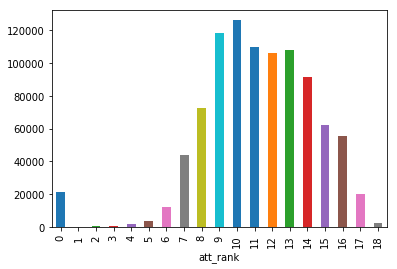

In [19]:
df.groupby('att_rank')['hp_dmg'].count().plot(kind='bar')

In [20]:
n_classes = 3
numeric_cats = {
    "att_rank": {0:"0", 1:"0", 2:"0", 3:"0", 4:"0", 5:"0", 6:"0", 7:"0", 8:"0", 
                9:"1", 10:"1", 11:"1", 12:"1",13:"1", 14:"1",
                15:"2", 16:"2", 17:"2", 18:"2"}
}
data.replace(numeric_cats, inplace=True)
data.head()

,hp_dmg,hitbox,att_rank,vic_rank,avg_match_rank
175379,0.28,0.0,1,0.555556,0.222222
903816,0.44,0.5,1,0.611111,0.444444
104196,0.13,0.0,2,0.833333,0.888889
33692,0.10,1.0,1,0.722222,0.666667
247244,0.15,0.0,2,0.888889,1.000000


In [21]:
y = data['att_rank']
X = data.copy()
del X['att_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index))))
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
print accuracy_score(y_test,y_pred)

0.8400577726145247


# Confusion Matrix

             precision    recall  f1-score   support

          0       0.76      0.56      0.64     31409
          1       0.85      0.93      0.89    131725
          2       0.86      0.71      0.78     27960

avg / total       0.84      0.84      0.83    191094



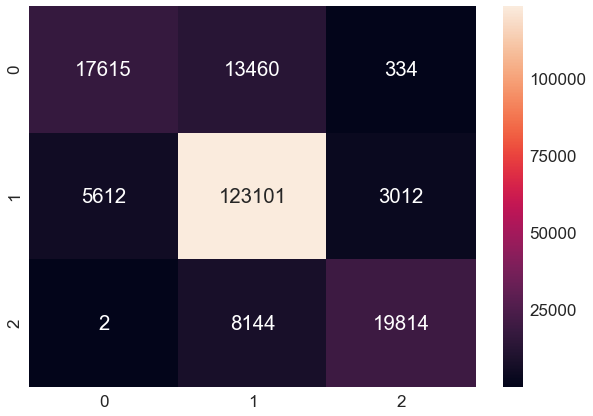

In [22]:
print classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(n_classes),range(n_classes))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.7)
sn.heatmap(df_cm, annot=True, fmt='g')

# Cross Validation

In [24]:
clf = neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index))))
sss = StratifiedShuffleSplit(n_splits=10)
scoresSSS = cross_val_score(clf, X, y, cv=sss, scoring='accuracy')
print(scoresSSS)


[0.84226611 0.84211959 0.84191026 0.84008917 0.84228704 0.84124044
 0.839524   0.84009964 0.84067527 0.83962866]


# Neural Network

In [25]:
import keras
import graphviz
import pydot_ng as pydot
from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [26]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=4))
model.add(Dropout(0.5))
for i in range(1,3):
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


pydot.find_graphviz()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [27]:
y_trainBinary = to_categorical(y_train)
hist = model.fit(X_train, y_trainBinary,validation_split=0.33,epochs=50,batch_size=128)


Train on 512129 samples, validate on 252243 samples
Epoch 1/50
512129/512129 [==============================] - 15s 30us/step - loss: 0.6617 - acc: 0.7156 - val_loss: 0.4612 - val_acc: 0.8111
Epoch 2/50
512129/512129 [==============================] - 14s 28us/step - loss: 0.5094 - acc: 0.7771 - val_loss: 0.4271 - val_acc: 0.8367
Epoch 3/50
512129/512129 [==============================] - 14s 28us/step - loss: 0.4748 - acc: 0.8040 - val_loss: 0.4211 - val_acc: 0.8354
Epoch 4/50
512129/512129 [==============================] - 14s 28us/step - loss: 0.4611 - acc: 0.8144 - val_loss: 0.4185 - val_acc: 0.8371
Epoch 5/50
512129/512129 [==============================] - 14s 28us/step - loss: 0.4524 - acc: 0.8193 - val_loss: 0.4149 - val_acc: 0.8360
Epoch 6/50
512129/512129 [==============================] - 14s 28us/step - loss: 0.4467 - acc: 0.8215 - val_loss: 0.4123 - val_acc: 0.8374
Epoch 7/50
512129/512129 [==============================] - 14s 28us/step - loss: 0.4422 - acc: 0.8241 - val

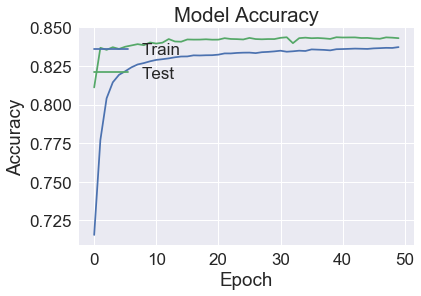

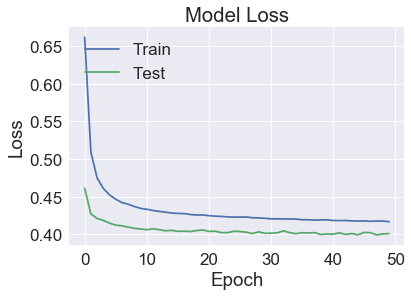

In [28]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
evals = model.evaluate(X_train, y_trainBinary, batch_size=len(X_train.index)/10)
y_pred=model.predict(X_test)
print evals

764372/764372 [==============================] - 2s 2us/step
[0.40210509932774696, 0.842413116560774]


128 4layer ln=0.01 --> 0.841
